In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [7]:
train_dir = r'./ds/training.csv'
test_dir = r'./ds/test.csv'

In [8]:
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [10]:
train_df.iloc[0].drop(labels='Image')

left_eye_center_x            66.033564
left_eye_center_y            39.002274
right_eye_center_x           30.227008
right_eye_center_y           36.421678
left_eye_inner_corner_x      59.582075
left_eye_inner_corner_y      39.647423
left_eye_outer_corner_x      73.130346
left_eye_outer_corner_y      39.969997
right_eye_inner_corner_x     36.356571
right_eye_inner_corner_y     37.389402
right_eye_outer_corner_x     23.452872
right_eye_outer_corner_y     37.389402
left_eyebrow_inner_end_x     56.953263
left_eyebrow_inner_end_y     29.033648
left_eyebrow_outer_end_x     80.227128
left_eyebrow_outer_end_y     32.228138
right_eyebrow_inner_end_x    40.227609
right_eyebrow_inner_end_y    29.002322
right_eyebrow_outer_end_x    16.356379
right_eyebrow_outer_end_y    29.647471
nose_tip_x                   44.420571
nose_tip_y                   57.066803
mouth_left_corner_x          61.195308
mouth_left_corner_y          79.970165
mouth_right_corner_x         28.614496
mouth_right_corner_y     

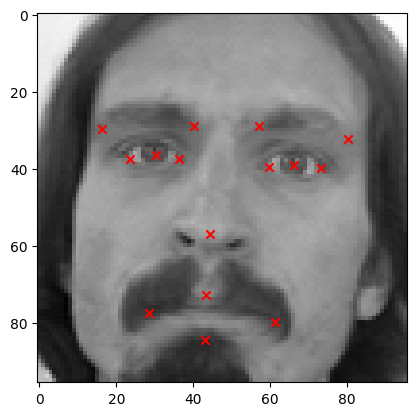

In [11]:
example_img = np.fromstring(train_df['Image'][0], sep=' ', dtype=np.uint8)
example_img = example_img.reshape(96, 96)

x_cor = []
y_cor = []

for i , value in enumerate(train_df.iloc[0].drop(labels='Image')):
    if i % 2 == 0 :
        x_cor.append(value)
    else:
        y_cor.append(value)

plt.imshow(example_img, cmap='gray')
plt.scatter(x_cor , y_cor , c='r' , marker='x')
plt.show()

In [12]:
def preprocess(df : pd.DataFrame):
    # Drop rows with any NaN in keypoint columns
    df_clean = df.dropna().reset_index(drop=True)
    img = np.array([np.fromstring(img, sep=' ', dtype=np.uint8) for img in df_clean['Image']])
    labels = df_clean.drop(columns=['Image']).to_numpy()
    return img, labels

In [13]:
X_train , y_train = preprocess(train_df)
X_test =  np.array([np.fromstring(img , sep=' ' , dtype=np.uint8) for img in test_df['Image']])

np.save('X_train.npy' , X_train)
np.save('y_train.npy' , y_train)
np.save('X_test.npy' , X_test)